# Visualise Three Body Problem using Euler, Symplectic Euler, Verlet and RK4

In [ ]:
import sys
sys.path.append('..')

from mpl_toolkits import mplot3d
import numpy as np
import math
from matplotlib import pyplot as plt
from Code.dynamical_system import *
from Code.time_integrator import *

##Define parameters for the three body chaotic system

In [ ]:
np.random.seed(2512517)
mass = [9,20,30]
G = 9.8 #6.674e-11
dt = 0.001
T_final = 100
ThreeBody = ThreeBody(mass, G)
forward_euler_integrator = ForwardEulerIntegrator(ThreeBody,dt)
verlet_integrator = VerletIntegrator(ThreeBody,dt)
symplectic_euler_integrator = SymplecticEulerIntegrator(ThreeBody,dt)
rk4_integrator = RK4Integrator(ThreeBody,dt)
x = np.zeros(9)
v = np.zeros(9)
x[:] = [-10,10, -11,0,0,0, 10,10,12]
v[:] = [-3,0,0, 0,0,0, 3,0,0]

##Integrate using the given numerical methods

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((4,n_step))
x_phase = np.zeros((4,n_step,9))
v_phase = np.zeros((4,n_step,9))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator,symplectic_euler_integrator,rk4_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = ThreeBody.energy(integrator.x,integrator.v)
        x_phase[j,k,:] = integrator.x[:]
        v_phase[j,k,:] = integrator.v[:]
        integrator.integrate(1)    

## Plot x-z phase space diagram of x- and y- coordinate of first mass

Text(0.5, 0, 'x-position $x$')

<Figure size 1440x576 with 0 Axes>

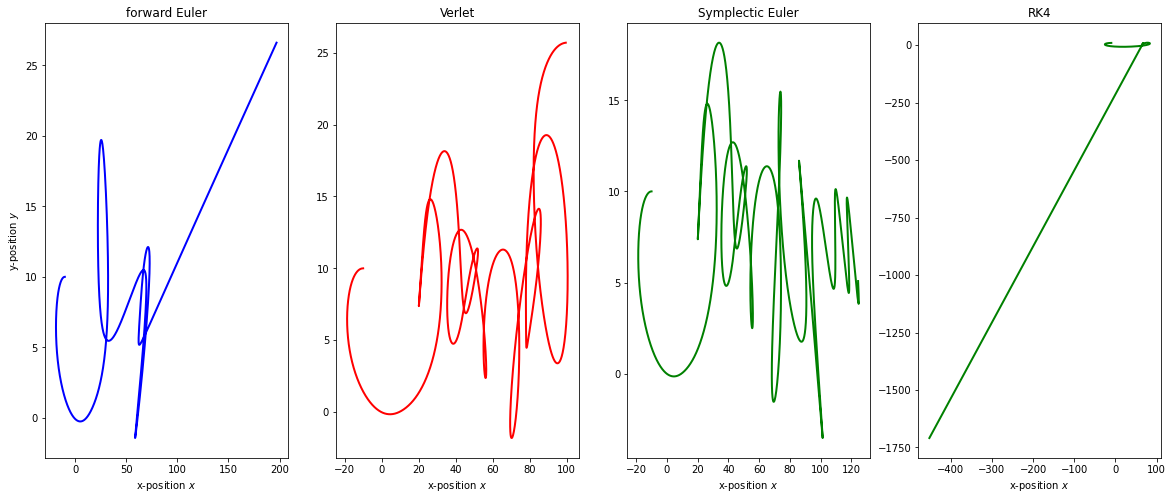

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]

plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:,0],x_phase[0,:,1],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('x-position $x$')
axs[0].set_ylabel('y-position $y$')
axs[1].plot(x_phase[1,:,0],x_phase[1,:,1],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('x-position $x$')
axs[2].plot(x_phase[2,:,0],x_phase[2,:,1],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('x-position $x$')
axs[3].plot(x_phase[3,:,0],x_phase[3,:,1],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('x-position $x$')

## Plot x-z phase space diagram of x- and z- coordinate of first mass

Text(0.5, 0, 'x-position $x$')

<Figure size 1440x576 with 0 Axes>

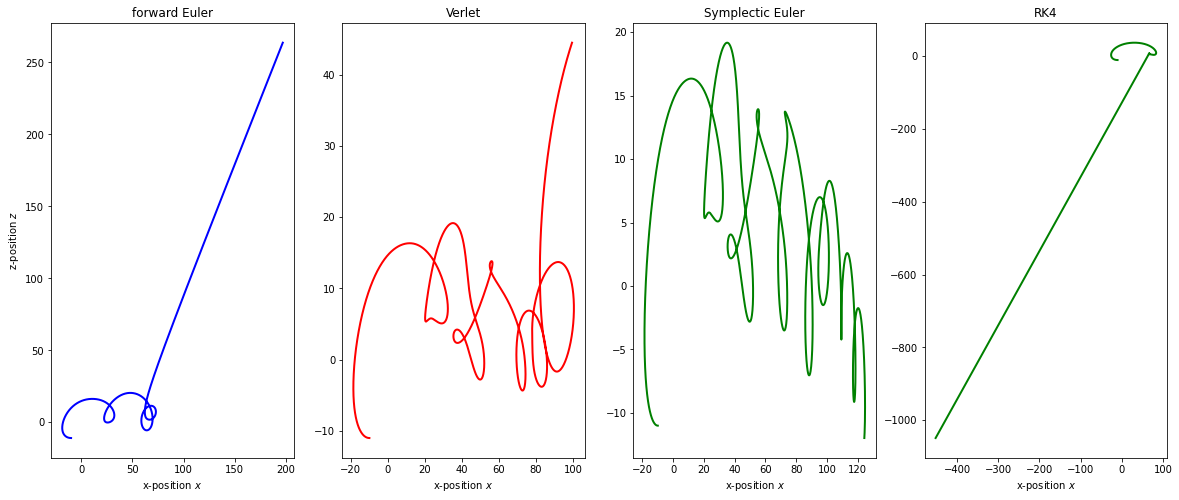

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]

plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:,0],x_phase[0,:,2],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('x-position $x$')
axs[0].set_ylabel('z-position $z$')
axs[1].plot(x_phase[1,:,0],x_phase[1,:,2],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('x-position $x$')
axs[2].plot(x_phase[2,:,0],x_phase[2,:,2],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('x-position $x$')
axs[3].plot(x_phase[3,:,0],x_phase[3,:,2],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('x-position $x$')

#3D plot of movement of all masses using Verlet

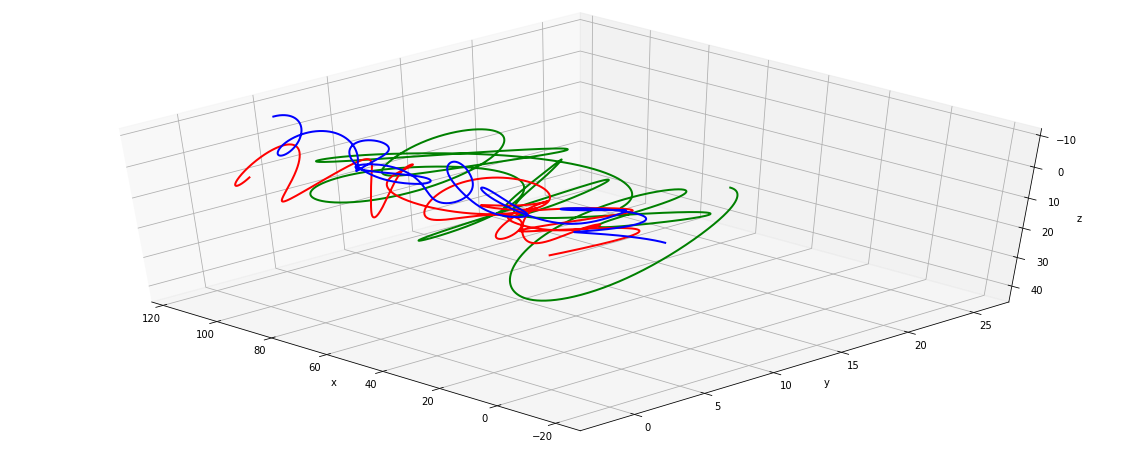

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(x_phase[1,:,0],x_phase[1,:,1],x_phase[1,:,2],linewidth=2,color='green')
ax.plot3D(x_phase[1,:,3],x_phase[1,:,4],x_phase[1,:,5],linewidth=2,color='red')
ax.plot3D(x_phase[1,:,6],x_phase[1,:,7],x_phase[1,:,8],linewidth=2,color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(225,45)

## Plot energy drift

<Figure size 1440x576 with 0 Axes>

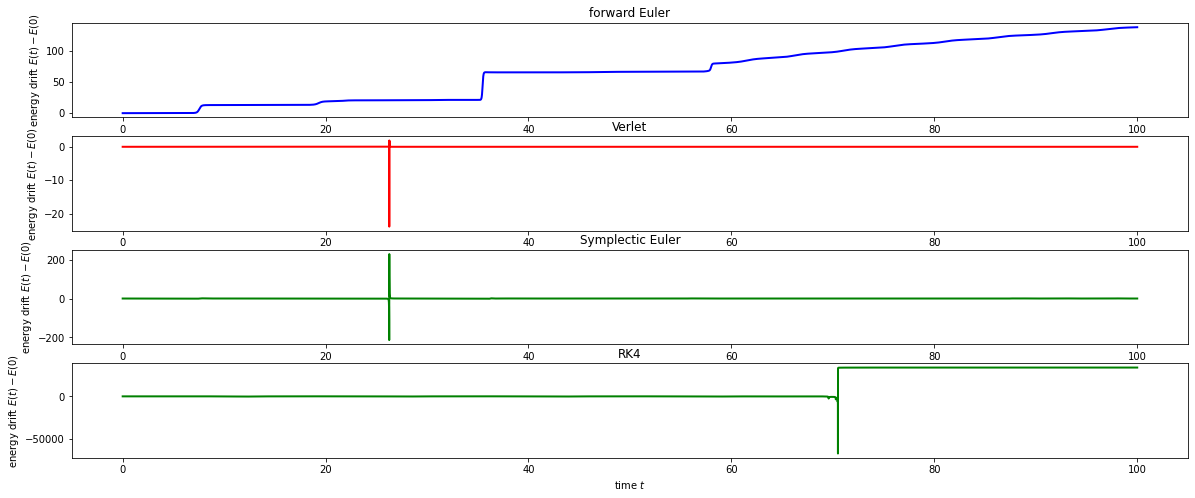

In [ ]:
plt.clf()
figs, axs = plt.subplots(4,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
axs[2].plot(X,energies[2,:]-energies[2,0],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('time $t$')
axs[2].set_ylabel('energy drift $E(t)-E(0)$')
axs[3].plot(X,energies[3,:]-energies[3,0],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('time $t$')
axs[3].set_ylabel('energy drift $E(t)-E(0)$')
plt.savefig('energies.pdf',bbox_inches='tight')